In [5]:
import experimentalStatistics as experimental
import changedStatistics as segmentation_stats
import plotting_funcs_thesis_edited as plot_funcs
import numpy as np
import pandas as pd
import csv
import os

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib import cycler
from matplotlib.ticker import FormatStrFormatter
import matplotlib.colors as colors

In [6]:
def Levenstein_Seg_Stats():
    """For every recording in the Levenstein data, calculate statistics and store in pandas dataframe"""
    
    # For every recording, get information and calculate stats, then store it:
    names_list = []
    mean_up_list = []
    cv_up_list = []
    mean_down_list = []
    cv_down_list = []
    ud_list = []
    du_list = []
    perc_up_list = []
    perc_down_list = []
    for root, dirs, files in os.walk('C:/Users/Shoshana/Documents/CSHL Summer/Data_CSVs/UpDownTimes_data'):
        if len(files) == 3:
            down_file = os.path.join(root, files[0])
            sws_file = os.path.join(root, files[1])
            up_file = os.path.join(root, files[2])
        
            mean_up, cv_up, mean_down, cv_down, ud, du, perc_up, perc_down = experimental.calculateStats(up_file, down_file, sws_file)
            name = root[67:]
        
            names_list.append(name)
            mean_up_list.append(mean_up)
            cv_up_list.append(cv_up)
            mean_down_list.append(mean_down)
            cv_down_list.append(cv_down)
            ud_list.append(ud)
            du_list.append(du)
            perc_up_list.append(perc_up)
            perc_down_list.append(perc_down)
    
    
    # Create the data frame:
    info_dict = {"Name": names_list, "meanUp": mean_up_list, "meanDown": mean_down_list, "cvUp": cv_up_list,  
                 "cvDown": cv_down_list, "SCC U->D": ud_list, "SCC D->U": du_list, "percUp": perc_up_list, "percDown": perc_down_list}
    Lev_Seg_Data = pd.DataFrame(info_dict)
    return Lev_Seg_Data
    

In [7]:
Lev_Seg_Data = Levenstein_Seg_Stats()
Lev_Seg_Data

,Name,meanUp,meanDown,cvUp,cvDown,SCC U->D,SCC D->U,percUp,percDown
0,20140526_277um,1.157039,0.149920,1.219617,0.348266,-0.020314,-0.006387,88.53,11.47
1,20140527_421um,0.838884,0.161418,1.162844,0.397500,0.011041,0.031862,83.86,16.14
2,20140528_565um,1.107483,0.142609,1.148961,0.343995,-0.010653,-0.020163,88.59,11.41
3,Bogey_012615,1.018048,0.267183,1.000499,0.360843,-0.019980,0.042369,79.21,20.79
4,BWRat17_121912,1.344484,0.210638,0.936948,0.561031,0.038660,-0.007208,86.46,13.54
5,BWRat18_020513,0.892737,0.221526,1.177494,0.426722,-0.009398,0.031640,80.12,19.88
6,BWRat19_032413,0.789726,0.249268,1.099620,0.462495,0.029983,0.084481,76.01,23.99
7,BWRat19_032513,0.850180,0.227585,0.948047,0.451765,0.037906,0.069066,78.88,21.12
8,BWRat20_101013,1.003019,0.239439,0.888124,0.347300,-0.023838,0.021169,80.73,19.27
9,BWRat21_121113,3.059266,0.229721,0.999820,0.341871,-0.001710,-0.000072,93.02,6.98


In [14]:
# Plot SCCs of all the already-segmented Levenstein data
# This is copied but slightly modified from "Manual Segmentation and Statistics Take 3. I am now calculating SCCs using ALL
# the data available, not averaging individual long enough SWS periods"


def Levenstein_segmentation_scc_plot():

    ud_sccs = []
    du_sccs = []
        
    for root, dirs, files in os.walk('C:/Users/Shoshana/Documents/CSHL Summer/Data_CSVs/UpDownTimes_data'):
        if len(files) == 3:
            down_file = os.path.join(root, files[0])
            sws_file = os.path.join(root, files[1])
            up_file = os.path.join(root, files[2])
    
            mean_up, cv_up, mean_down, cv_down, ud, du, percUp, percDown = experimental.calculateStats(up_file, down_file, sws_file)
            
            ud_sccs.append(ud)
            du_sccs.append(du)
    
    # Plotting:
    fig, ax = plt.subplots()
    plt.scatter(du_sccs, ud_sccs, s = 100) 
    plt.xlabel("D->U SCC")
    plt.ylabel("U->D SCC")
    lims = [-0.1, 0.2]
    #lims = [
    #    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    #    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
    #]
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    ax.set_xlim(lims)
    ax.set_ylim(lims)


(-0.1, 0.4)

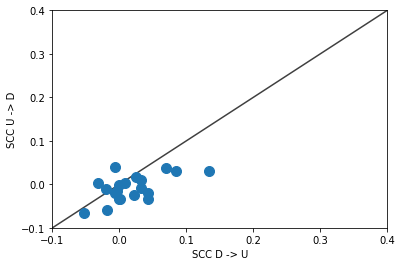

In [33]:
# Plot SCCs using the pandas dataframe

fig, ax = plt.subplots()
lims = [-0.1, 0.4]
plt.scatter(x = Lev_Seg_Data["SCC D->U"], y = Lev_Seg_Data["SCC U->D"], s = 100) 
plt.xlabel("SCC D -> U")
plt.ylabel("SCC U -> D")
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_xlim(lims)
ax.set_ylim(lims)


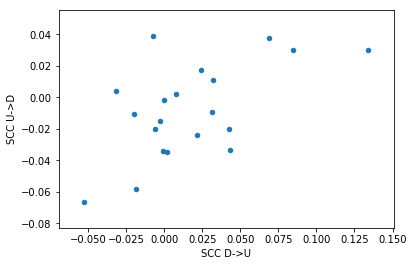

In [15]:
Lev_Seg_Data.plot.scatter(x = "SCC D->U", y = "SCC U->D")

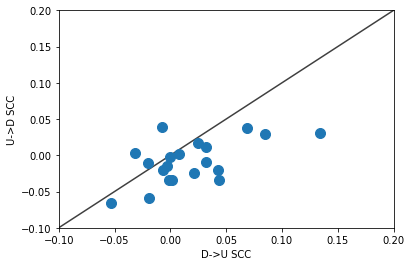

In [16]:
Levenstein_segmentation_scc_plot()

In [9]:
# Create a data frame of statistics used by the classifier

classifierData = pd.DataFrame.copy(Lev_Seg_Data)

classifierData["cvDiff"] = classifierData["cvUp"] - classifierData["cvDown"]
classifierData["sccDiff"] = classifierData["SCC U->D"] - classifierData["SCC D->U"]
classifierData.drop(labels = ["cvUp", "cvDown"], axis = 1, inplace = True)
classifierData.drop(labels = ["SCC U->D", "SCC D->U"], axis = 1, inplace = True)
classifierData.drop(labels = ["meanUp", "meanDown", "percDown"], axis = 1, inplace = True)

classifierData

,Name,percUp,cvDiff,sccDiff
0,20140526_277um,88.53,0.871351,-0.013927
1,20140527_421um,83.86,0.765343,-0.020821
2,20140528_565um,88.59,0.804966,0.009510
3,Bogey_012615,79.21,0.639657,-0.062349
4,BWRat17_121912,86.46,0.375917,0.045869
5,BWRat18_020513,80.12,0.750773,-0.041038
6,BWRat19_032413,76.01,0.637125,-0.054497
7,BWRat19_032513,78.88,0.496282,-0.031160
8,BWRat20_101013,80.73,0.540824,-0.045007
9,BWRat21_121113,93.02,0.657948,-0.001638


(-1, 1)

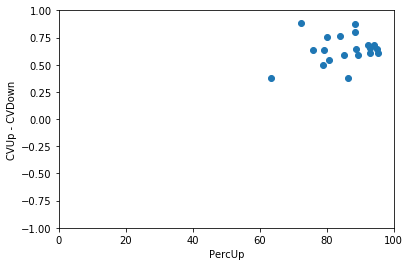

In [48]:
fig, ax = plt.subplots()
plt.scatter(x = classifierData["percUp"], y = classifierData["cvDiff"]) 
plt.xlabel("PercUp")
plt.ylabel("CVUp - CVDown")
#ax.plot([0, 0], [100, 0], 'k-', alpha=0.75, zorder = 0)
#ax.plot([50, -1], [50, 1], 'k-', alpha=0.75, zorder = 1)
ax.set_xlim([0, 100])
ax.set_ylim([-1, 1])

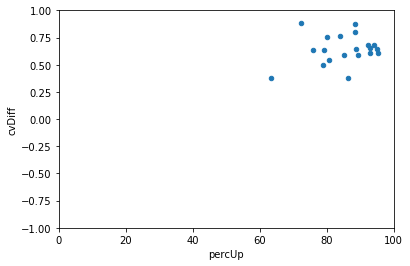

In [26]:
classifierData.plot.scatter(x = "percUp", y = "cvDiff", xlim = [0, 100], ylim = [-1, 1])